#What is needed, what do we want to simulate 
#Try to make a small-scale energy mangement system 
#Build something how much money you could save 
#Taking the perspective of someone trying to install a solar system 
#IF you have a solar system what do you gain by isntalling 
#ASsume you have 3 types of use of electricity - lighting and typical use, more intensive consumption
#such as air conditioing, third would be lectric vehicle 

#Would start by finding three types of utilties to model those types of consumption 

#One utility function expressed there 

#Could yo do something like scaling based on their amount consumed 
#Consider how you have to model something from the renewbales
#Different kinds of renewbales models evlauted with or without solar 
#Comapre baseline to with renewable 

#Utility function generated from data 

#solar panel traces for a spefic day 
#picantstreet solar with smart meter consumption 
#Do smaller scale data 
#Use actual soalr consumption data, have an estimated utility function 
#Then answer roguhly the same type of question, with or without soalr what do you get 

#Many choices of retail pricing 
#Everybody has their own different values 
#Could see fixed charges based on solar capacity 

#Use their pricing equations for retail pricing 
#Becomes a parameter of the problem rather than something that changes constantly 
#Use stepping equation 
#Utility has to go to regulator every year to ask them to reset the price, the regulator is doing something different from Ramsey pricing. 
#They guarantee their costs are recovered then choose a different parameter 
# Forgot about changing prices
#PRice becomes a parameter 

#Do a project that is manaeble, build it around problem 1 but use real data of rooftop solar generation 
#Estimate utility parameter
#Evaluate what owould be the surplus and what would be the payment with and without rooftop 

#Talks about how much rooftop solar generates 

90IdyNRwQOO0iv3PXV6wPAbfHl8dKrBFXWDWBadf

In [1]:
import numpy as np
from geopy.geocoders import Nominatim

# initialize Nominatim API 
geolocator = Nominatim(user_agent="geoapiExercises")

place = "NY Larchmont 10538"
location = geolocator.geocode(place)
print(location.latitude) 
coords = [str(location.latitude), str(location.longitude)]

api_pull = 'https://developer.nrel.gov/api/solar/solar_resource/v1.json?lat=' + coords[0]+ '&lon='+ coords[1] + '&api_key=90IdyNRwQOO0iv3PXV6wPAbfHl8dKrBFXWDWBadf' 

print(api_pull)

40.93565510435881
https://developer.nrel.gov/api/solar/solar_resource/v1.json?lat=40.93565510435881&lon=-73.75707389271197&api_key=90IdyNRwQOO0iv3PXV6wPAbfHl8dKrBFXWDWBadf


In [2]:
import requests 
import json
import pandas as pd

#Selecting Type of Module Used in Array
mod_options = ['Standard', 'Premium', 'Thin film'] 

module = 'Standard'

mod_df =pd.DataFrame({'Standard': [0], 'Premium': [1], 'Thin film': [2]})

module_type = mod_df[module][0]
sys_cap = 15
#Tilt of the Soalr Cells relatie to horizontal
tilt = coords[0]

#Selecting The Proper Array Arrangement
arr_options = ['Fixed - Open Rack', 'Fixed - Roof Mounted', '1-Axis', '1-Axis Backtracking', '2-Axis']
arr_df = pd.DataFrame({'Fixed - Open Rack':[0], 'Fixed - Roof Mounted':[1], '1-Axis':[2] \
,'1-Axis Backtracking':[3], '2-Axis':[4]})

array = 'Fixed - Roof Mounted'

array_type = arr_df[array][0]


#Azimuth angle
azi_options = ['S','SSW', 'SW','WSW','W','WNW', 'NW','NNW', 'N' ,'NNE','NE', 'ENE', 'E', 'ESE', 'SE','SSE']
azi_df = pd.DataFrame({'S':[0], 'SSW':[22.5], 'SW':[45],'WSW':[67.5],'W':[90],'WNW':[112.5], 'NW':[135],'NNW':[157.5],\
     'N':[180],'NNE':[202.5],'NE':[225], 'ENE':[247.5], 'E':[270], 'ESE':[297.5], 'SE':[315],'SSE':[337.5]}) 
azi = 'S'
azimuth = azi_df[azi][0]

# Now Add the losses your system will experience 
losses = 15


# Now Use the Latitude and Longitude Given to doan API pull of the soalr data from NREL 
api_pull = 'https://developer.nrel.gov/api/pvwatts/v6.json?lat=' + coords[0]+ '&lon='+ coords[1]\
 + '&module_type=' + str(module_type)+ '&system_capacity=' + str(sys_cap) + '&tilt=' + str(tilt) + '&array_type='\
    + str(array_type) + '&azimuth=' + str(azimuth) +'&losses=' + str(losses)\
         +'&api_key=90IdyNRwQOO0iv3PXV6wPAbfHl8dKrBFXWDWBadf'

print(api_pull)

https://developer.nrel.gov/api/pvwatts/v6.json?lat=40.93565510435881&lon=-73.75707389271197&module_type=0&system_capacity=15&tilt=40.93565510435881&array_type=1&azimuth=0&losses=15&api_key=90IdyNRwQOO0iv3PXV6wPAbfHl8dKrBFXWDWBadf


In [25]:
response_API = requests.get(api_pull) 

data =response_API.text
dict = json.loads(data) 
d2 = dict['outputs'] 

#Need to figure out how to access ghi data specifically by month 
df = pd.DataFrame.from_dict(d2)
print(df.ac_monthly)  

0      234.132751
1      293.464539
2      522.079834
3      989.313354
4     1419.654785
5     1529.273193
6     1541.031616
7     1112.291138
8      597.998779
9      335.686462
10     232.596756
11     216.794159
Name: ac_monthly, dtype: float64


In [23]:
print(round(float(coords[0]))) 
d3 = df.monthly 

print(d3.avg_ghi)

mod_df =pd.DataFrame({'Standard': [0], 'Premium': [1], 'Thin film': [2]})
print(mod_df['Premium'][0])

41
{'jan': 2.01, 'feb': 2.92, 'mar': 3.92, 'apr': 4.81, 'may': 5.52, 'jun': 5.83, 'jul': 5.94, 'aug': 5.22, 'sep': 4.29, 'oct': 3.06, 'nov': 2.1, 'dec': 1.73}
1


[ 206.14285714 2426.14285714  -38.32142857]


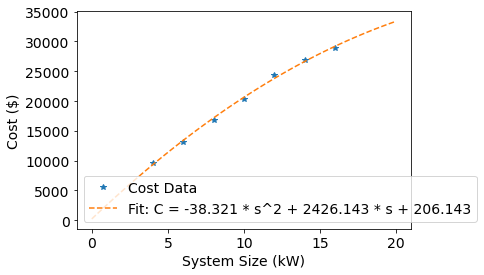

In [7]:
import numpy as np 
from numpy.polynomial import polynomial as p 
import matplotlib.pyplot as plt
size = [4 , 6 , 8, 10, 12, 14, 16 ]
cost = [9620, 13098, 16872, 20350, 24420, 26936, 28860]
degree = 2
c, stats = p.polyfit(size, cost, degree, full=True)
size_fit = np.linspace(0, 20, 101)
cost_fit = p.polyval(size_fit,c)
plt.plot(size, cost, '*', label ='Cost Data') 


plt.plot(size_fit, cost_fit, '--', label = 'Fit: C = %5.3f * s^2 + %5.3f * s + %5.3f' %tuple([c[2], c[1], c[0]]))
plt.xlabel('System Size (kW)')
plt.ylabel('Cost ($)')
plt.legend()
plt.rcParams['font.size'] = 13
print(c)

In [ ]:
obj = TimezoneFinder()
tz = obj.timezone_at(lng = lon, lat = lat) 
site_location = location.Location(lat, lon, tz=tz)

dates= ['01-01-2019', '01-01-2021']
days = [31, 28, 31, 30, 31, 30, 31,31, 30, 31, 30, 31] 

dy_irad = np.zeros([8760,2])
for i in range(0,len(dates)):
     dy_irad[:,i] = get_irradiance(site_location, dates[i], tilt, azimuth)
     
     
for h in range(0,len(days)): 
     avg_irad = (dy_irad[:,0] + dy_irad[:,1])/2 


In [5]:
# Now Use the Latitude and Longitude Given to doan API pull of the utility rates from NREL 
price_pull = 'https://developer.nrel.gov/api/utility_rates/v3.json?lat=' + coords[0]+ '&lon='+ coords[1] +'&api_key=90IdyNRwQOO0iv3PXV6wPAbfHl8dKrBFXWDWBadf'

response_API = requests.get(price_pull) 
# utility pricing data is in $/kWh 
Pdata =response_API.text
Pdict = json.loads(Pdata) 
Pd2 = Pdict['outputs'] 
price_df = pd.DataFrame.from_dict(Pd2)
print(price_df) 

print(7500 *.2)

  company_id                            utility_name  \
0       4226  Consolidated Edison Co of New York Inc   

                                        utility_info  commercial  industrial  \
0  {'company_id': '4226', 'utility_name': 'Consol...      0.1155       0.106   

   residential  
0       0.2321  
1500.0
